# Exercise 3-1: Create some plots

In [4]:
import pandas as pd

## Get the data

In [5]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [6]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<Axes: xlabel='Year', ylabel='DeathRate'>

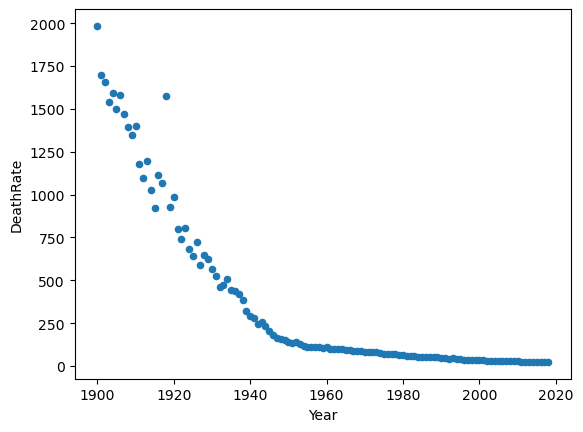

In [8]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<Axes: xlabel='Year'>

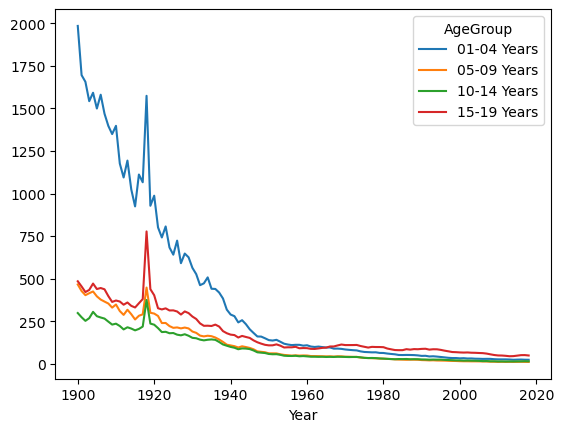

In [9]:
mortality_wide.plot()

<Axes: title={'center': 'Mortality Rates For Children 15-19'}, xlabel='Year'>

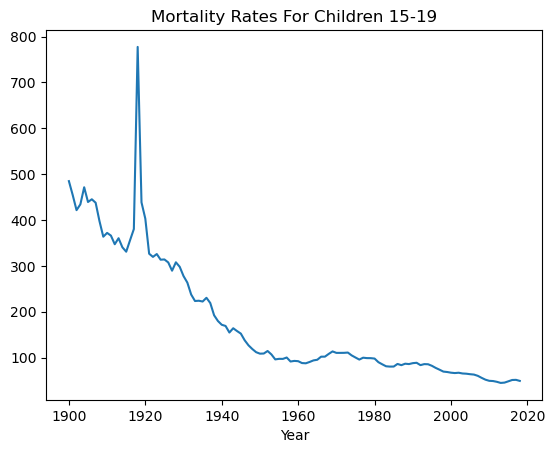

In [10]:
mortality_wide.plot.line(y=['15-19 Years'], title= 'Mortality Rates For Children 15-19', legend=False)

<Axes: xlabel='Year'>

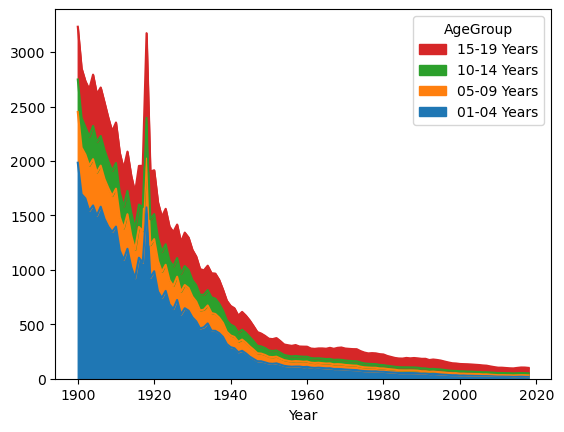

In [13]:
mortality_wide.plot.area(legend='reverse')

<Axes: xlabel='Year'>

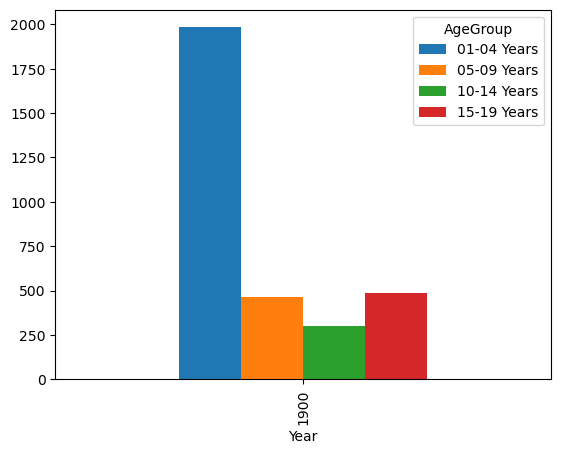

In [24]:
mortality_wide.query('Year == 1900').plot.bar()

<Axes: title={'center': 'Childs Mortality: 2000'}>

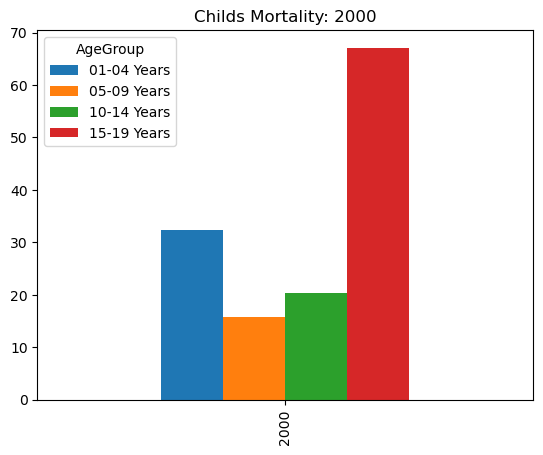

In [15]:
mortality_wide.query('Year == 2000').plot.bar(title= 'Childs Mortality: 2000', xlabel= '',) 

<Axes: title={'center': 'Childs Mortality: 2000'}, ylabel='Death Rate Per 100,000'>

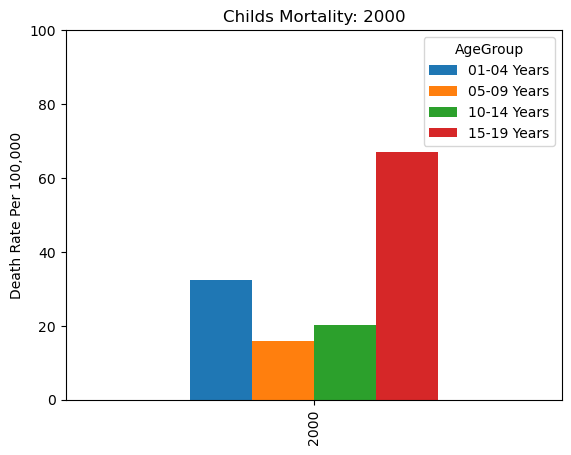

In [113]:
mortality_data.query('Year == 2000') \
    .pivot(index= 'Year', columns='AgeGroup', values='DeathRate') \
    .plot.bar(title= 'Childs Mortality: 2000', xlabel= '',ylabel= 'Death Rate Per 100,000', ylim= (0,100))

<Axes: ylabel='Frequency'>

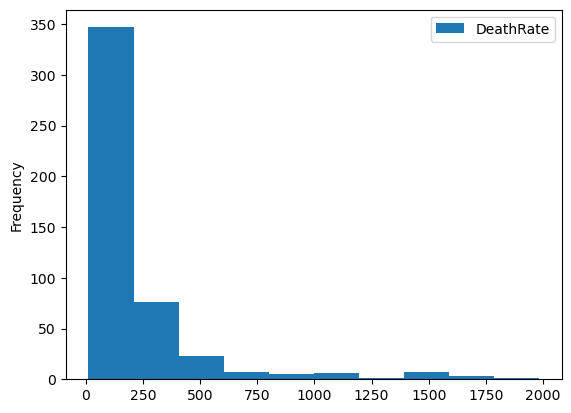

In [112]:
mortality_data.plot.hist(y='DeathRate')

<Axes: ylabel='Frequency'>

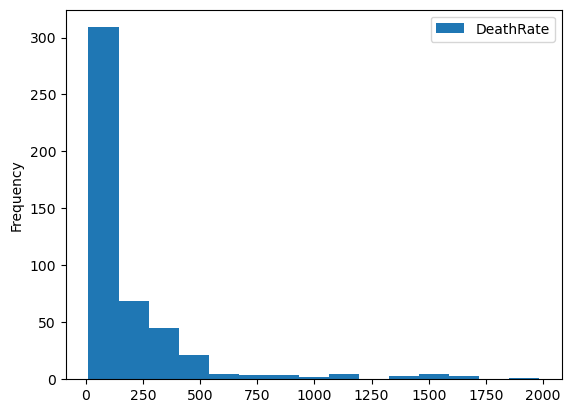

In [111]:
mortality_data.plot.hist(y='DeathRate', bins=15)

<Axes: title={'center': 'Death Rate Projections: 1900'}, ylabel='Density'>

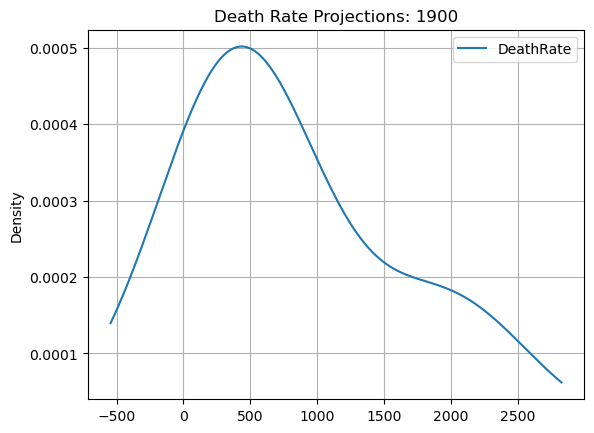

In [61]:
mortality_data.query('Year == 1900').plot.density(title= 'Death Rate Projections: 1900', y= 'DeathRate', grid= True)

<Axes: ylabel='DeathRate'>

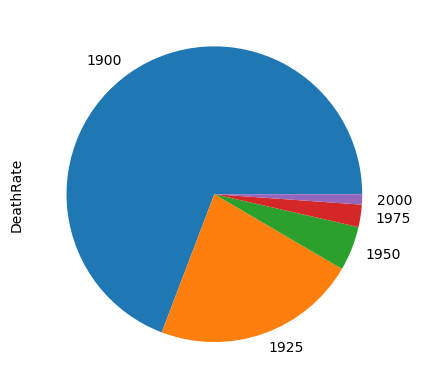

In [110]:
mortality_data.loc[0:100:25].groupby('Year')['DeathRate'].sum().plot.pie()

array([[<Axes: title={'center': 'Child Mortality: 01-04'}, xlabel='Deaths per 100,000', ylabel='Years'>,
        <Axes: title={'center': 'Child Mortality: 05-09'}, xlabel='Deaths per 100,000', ylabel='Years'>],
       [<Axes: title={'center': 'Child Mortality: 10-14'}, xlabel='Deaths per 100,000', ylabel='Years'>,
        <Axes: title={'center': 'Child Mortality: 15-19'}, xlabel='Deaths per 100,000', ylabel='Years'>]],
      dtype=object)

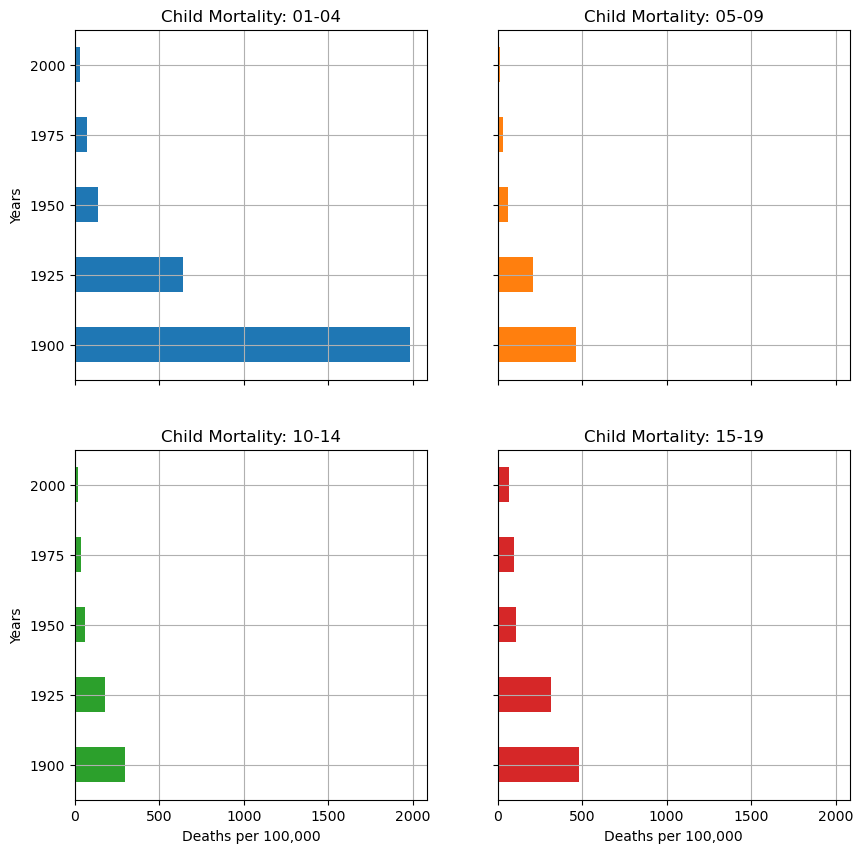

In [214]:
mortality_data.query('Year in (1900,1925,1950,1975,2000)') \
    .pivot(index='Year', columns='AgeGroup', values='DeathRate') \
    .plot.barh(
    title = ['Child Mortality: 01-04', 'Child Mortality: 05-09', 
             'Child Mortality: 10-14', 'Child Mortality: 15-19'],
    ylabel='Years', xlabel= 'Deaths per 100,000', legend=False, sharey=True, sharex=True, grid=True,
    subplots=True, layout=(2,2), figsize=(10,10))